In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, auc

In [2]:
df = pd.read_csv('Generator/2019loans.csv')
df.head()


,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [3]:
#display(list(df.columns.values))

In [4]:
X = df.drop('target', axis=1)
X.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,100.0,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,85.7,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,94.3,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,92.9,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,84.1,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N


In [5]:
X_dummies = pd.get_dummies(X)
#print(X_dummies.columns)
X_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,0,1,1,0,1,0,1,0,1,0
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,0,1,0,1,1,0,1,0,1,0
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,1,1,0,1,1,0,1,0,1,0
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,0,1,0,1,0,1,1,0,1,0
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,0,1,0,1,1,0,1,0,1,0


In [6]:
#X_dummies.dtypes.head(5)

In [7]:
y_label = LabelEncoder().fit_transform(df['target'])
y_label

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
#display(list(X_dummies.columns.values))

In [9]:
df1 = pd.read_csv('Generator/2020Q1loans.csv')
df1.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [10]:
#display(list(df1.columns.values))

In [11]:
X1 = df1.drop('target', axis=1)
X1.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,84.2,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,100.0,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,100.0,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,91.4,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,100.0,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N


In [12]:
X1_dummies = pd.get_dummies(X1)
#print(X1_dummies.columns)
X1_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,1,0,1,0,1,1,0,0,1,1
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,0,1,0,1,1,0,1,0,1
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,0,1,0,1,1,0,0,1,1
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,0,1,1,0,1,1,0,1,0,1
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,1,0,1,0,1,1,0,1,0,1


In [13]:
y1_label = LabelEncoder().fit_transform(df1['target'])
y1_label

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
#display(list(X1_dummies.columns.values))

In [15]:
set2019 =set((X_dummies.columns.values)) 
set2020=set((X1_dummies.columns.values)) 
missing_columns = set2019.difference(set2020)
print("Missing columns :", missing_columns)

Missing columns : {'debt_settlement_flag_Y'}


In [16]:
X1_dummies["debt_settlement_flag_Y"] = 0
X1_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,0,1,0,1,1,0,0,1,1,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,1,0,1,1,0,1,0,1,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,1,0,1,1,0,0,1,1,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,1,1,0,1,1,0,1,0,1,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,0,1,0,1,1,0,1,0,1,0


### LogisticRegression Model

Logistic regression as a well known and used classification should work well with our data. We used Logistic Regression Model on unscaled data first, then we  improved model by changing the C value. (C:Inverse of regularization strength)


In [18]:
reg = LogisticRegression(max_iter=10000, random_state = 42).fit(X_dummies, y_label)

#reg.score(X1_dummies,y1_label)
print(f"Training Data Score: {reg.score(X_dummies, y_label)}")
print(f"Testing Data Score: {reg.score(X1_dummies, y1_label)}")

print('Model:Logistic Regression')
print(f'score:{reg.score(X1_dummies, y1_label)}\n')


Training Data Score: 0.7054187192118226
Testing Data Score: 0.5642279880901744
Model:Logistic Regression
score:0.5642279880901744



In [19]:
target_names = ["high_risk", "low_risk"]

In [20]:
predictions = reg.predict(X1_dummies)

y_true = y1_label
y_pred = reg.predict(X1_dummies)
#print(y_pred)
confusion_matrix_l = confusion_matrix(y_true, y_pred)
confusion_matrix_l
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=target_names))
      

[[ 828 1523]
 [ 526 1825]]
              precision    recall  f1-score   support

   high_risk       0.61      0.35      0.45      2351
    low_risk       0.55      0.78      0.64      2351

    accuracy                           0.56      4702
   macro avg       0.58      0.56      0.54      4702
weighted avg       0.58      0.56      0.54      4702



In [21]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_pred))

Accuracy: 0.5642279880901744
Precision: 0.5451015531660693
Sensitivity: 0.7762654189706508


Text(0.5, 257.44, 'Predicted label')

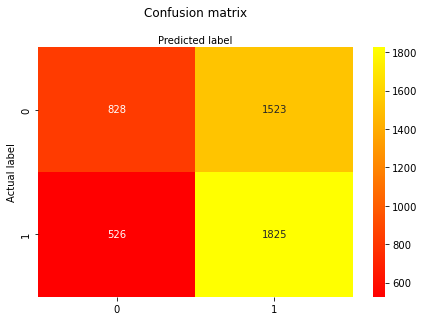

In [22]:
class_names=["high_risk","low_risk"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_l), annot=True, cmap="autumn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from sklearn.metrics import auc


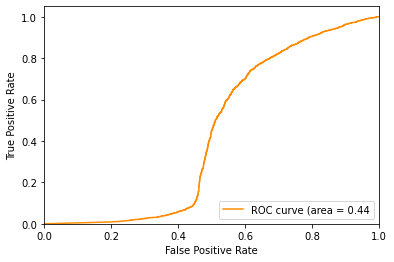

In [24]:
#ROC Curve - plot of the true positive rate against the false positive rate
y_pred_proba = reg.predict_proba(X1_dummies)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_label,  y_pred_proba)
auc = metrics.roc_auc_score(y1_label, y_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Improving Logistic Regression Model 

Model is improved by setting different parameters, in this case inverse of regularization strenght C is set up to 100.0 instead of the default value of 1.0. We will have a different model with different confusion matrix, classification report. 
The larger value of C means weaker regularization, or weaker penalization.
The weight coefficients shrink if we decrease the parameter C (increase the regularization strength, λ) We expect to get changed possible outputs and classification performace.

In [25]:
reg_imp = LogisticRegression(max_iter=10000, C=100.0, random_state = 42).fit(X_dummies, y_label)

#reg-imp.score(X1_dummies,y1_label)
print(f"Training Data Score: {reg_imp.score(X_dummies, y_label)}")
print(f"Testing Data Score: {reg_imp.score(X1_dummies, y1_label)}")

print('Model:Logistic Regression')
print(f'score:{reg_imp.score(X1_dummies, y1_label)}\n')


Training Data Score: 0.7061576354679803
Testing Data Score: 0.5633772862611655
Model:Logistic Regression
score:0.5633772862611655



In [26]:

y1_true = y1_label
y1_pred = reg_imp.predict(X1_dummies)
#print(y_pred)
confusion_matrix_l_imp = confusion_matrix(y1_true, y1_pred)
confusion_matrix_l_imp
print(confusion_matrix(y1_true, y1_pred))
print(classification_report(y1_true, y1_pred, target_names=target_names))
      

[[ 836 1515]
 [ 538 1813]]
              precision    recall  f1-score   support

   high_risk       0.61      0.36      0.45      2351
    low_risk       0.54      0.77      0.64      2351

    accuracy                           0.56      4702
   macro avg       0.58      0.56      0.54      4702
weighted avg       0.58      0.56      0.54      4702



In [27]:
print("Accuracy:",metrics.accuracy_score(y1_true, y1_pred))
print("Precision:",metrics.precision_score(y1_true, y1_pred))
print("Sensitivity:",metrics.recall_score(y1_true, y1_pred))

Accuracy: 0.5633772862611655
Precision: 0.5447716346153846
Sensitivity: 0.7711612079965972


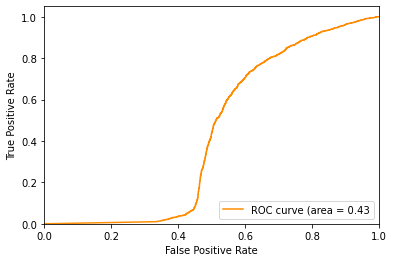

In [28]:
y_imp_pred_proba = reg_imp.predict_proba(X1_dummies)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_label,  y_imp_pred_proba)
auc = metrics.roc_auc_score(y1_label, y_imp_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In both cases the Logistic Regression Model with unscaled data didn't fit well to make further predictions related to new unseen data. For the first model the score was 0.5642, and the AUC was 0.44. When we try to improve C value, score was 0.5633 and AUC value 0.43.  
The value of AUC (area under the curve) below 0.5 means that the model is no more predicitive than random chance. 

### RandomForestRegression Model

RandomForestRegression Model is considered as a highly accurate method, but is slower in generating predictions. Multiple decision trees are used to determine the final output  - the average of all the tree outputs is considered as the final result, which gives more accurate and stable prediction.
we predict that it will fit better to our dataset with multiple features. 

In [29]:
ran = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=None).fit(X_dummies, y_label)
y_r_pred = ran.predict(X1_dummies)
y_true = y1_label
cm_r = confusion_matrix(y_true, y_r_pred)
cm_r


array([[1961,  390],
       [1270, 1081]], dtype=int64)

In [30]:
print(classification_report(y1_label, y_r_pred, target_names=target_names))
print(f'Training Score: {ran.score(X_dummies, y_label)}')
print(f'Testing Score: {ran.score(X1_dummies, y1_label)}')

              precision    recall  f1-score   support

   high_risk       0.61      0.83      0.70      2351
    low_risk       0.73      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.63      4702
weighted avg       0.67      0.65      0.63      4702

Training Score: 1.0
Testing Score: 0.646958740961293


In [31]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_true, y_r_pred))
print("Precision:",metrics.precision_score(y_true, y_r_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_r_pred))

Accuracy: 0.646958740961293
Precision: 0.7348742352141401
Sensitivity: 0.45980433857932795


[1.64175246e-02 3.36047005e-02 3.07032294e-02 1.42239163e-02
 1.54887781e-02 2.97922850e-03 4.27051795e-03 8.55840612e-03
 1.33532005e-03 1.51577257e-02 1.16142472e-02 2.95307776e-02
 2.99764667e-02 4.53332754e-02 4.48443196e-02 5.25173382e-02
 4.98329797e-02 1.62671260e-02 0.00000000e+00 0.00000000e+00
 9.97444637e-02 6.56760511e-04 0.00000000e+00 0.00000000e+00
 4.27868968e-03 1.34563223e-02 4.63160385e-03 6.58760719e-03
 4.03294385e-03 6.17692505e-03 1.18528253e-02 1.31099214e-02
 1.40812113e-02 5.12304140e-03 7.78349300e-03 1.53878110e-02
 1.33159958e-02 1.54529099e-02 5.98482161e-03 6.83047428e-03
 7.85674268e-03 9.78167759e-03 1.39355711e-02 1.55873811e-02
 1.40840046e-02 2.93482835e-04 0.00000000e+00 1.54613564e-02
 1.62359542e-02 1.18244670e-02 1.00680524e-02 5.67200574e-03
 1.29851695e-02 1.18672718e-02 3.62464457e-03 7.08920963e-03
 7.86624182e-03 7.36513040e-03 8.69878830e-03 1.01283162e-02
 8.34738211e-03 9.97869361e-03 7.97169822e-03 8.66230546e-03
 0.00000000e+00 0.000000

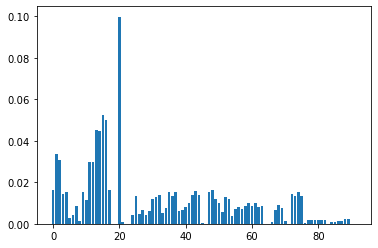

In [32]:
# Feature Selection Methods - trying to find  the most appropriate features

%matplotlib inline
from matplotlib import pyplot as plt

features = ran.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

### Data scaling

### LogisticRegression Model  (Scaled)

In [33]:
scaler = StandardScaler().fit(X_dummies)

X_dummies_scaled = scaler.transform(X_dummies)
X1_dummies_scaled = scaler.transform(X1_dummies) 

In [34]:
reg_scaled = LogisticRegression(max_iter=10000).fit(X_dummies_scaled, y_label)
#reg_scaled.score(X1_dummies_scaled,y1_label)

y_scaled_pred = reg_scaled.predict(X1_dummies_scaled)
cm = confusion_matrix(y_true, y_scaled_pred)
cm

array([[1762,  589],
       [ 540, 1811]], dtype=int64)

In [35]:
print(classification_report(y1_label, y_scaled_pred, target_names=target_names))
print(f'Training Score: {reg_scaled.score(X_dummies_scaled, y_label)}')
print(f'Testing Score: {reg_scaled.score(X1_dummies_scaled, y1_label)}')
print(f'LogisticRegression Score:{reg_scaled.score(X1_dummies_scaled,y1_label)}\n')

              precision    recall  f1-score   support

   high_risk       0.77      0.75      0.76      2351
    low_risk       0.75      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702

Training Score: 0.710919540229885
Testing Score: 0.7598894087622289
LogisticRegression Score:0.7598894087622289



In [36]:
print("Accuracy:",metrics.accuracy_score(y_true, y_scaled_pred))
print("Precision:",metrics.precision_score(y_true, y_scaled_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_scaled_pred))

Accuracy: 0.7598894087622289
Precision: 0.7545833333333334
Sensitivity: 0.7703105061675882


Text(0.5, 257.44, 'Predicted label')

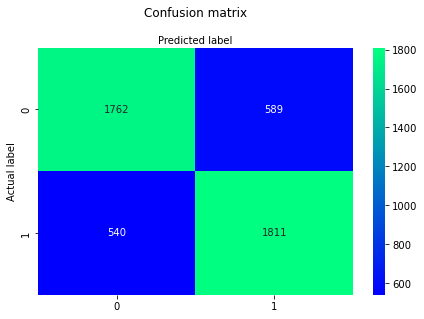

In [37]:
class_names=["high_risk","low_risk"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="winter" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

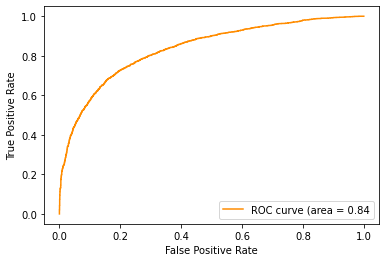

In [38]:
#ROC Curve - plot of the true positive rate against the false positive rate
y_pred_proba = reg_scaled.predict_proba(X1_dummies_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_label,  y_pred_proba)
auc = metrics.roc_auc_score(y1_label, y_pred_proba)
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

ROC curve shows trade-off between sensitivity and specificity.
In this case  AUC score is 0.84 for the scaled data (For the unscaled data AUC score was 0.44) In this scenario the Logistic Regression Model works better with data processed with StandardScaler, as the value of AUC is closer to score 1.0 (which represents the perfect classifier). It will work better with the unseen data to predict the future values.


### RandomForestRegression Model - Scaled

In [39]:
ran_scaled = RandomForestClassifier(random_state=0, n_estimators=500).fit(X_dummies_scaled, y_label)
y_ran_scaled_pred = ran_scaled.predict(X1_dummies_scaled)

y_rs_true = y1_label
cm_rs = confusion_matrix(y_rs_true, y_ran_scaled_pred)
cm_rs

array([[1954,  397],
       [1268, 1083]], dtype=int64)

In [40]:
print(classification_report(y_rs_true, y_ran_scaled_pred, target_names=target_names))
print(f'Training Score: {ran_scaled.score(X_dummies_scaled, y_label)}')
print(f'Testing Score: {ran_scaled.score(X1_dummies_scaled, y_rs_true)}')
print(f'RandomForestRegression Score:{ran_scaled.score(X1_dummies_scaled,y_rs_true)}')


              precision    recall  f1-score   support

   high_risk       0.61      0.83      0.70      2351
    low_risk       0.73      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.63      4702
weighted avg       0.67      0.65      0.63      4702

Training Score: 1.0
Testing Score: 0.6458953636750319
RandomForestRegression Score:0.6458953636750319


In [41]:
print("Accuracy:",metrics.accuracy_score(y_rs_true, y_ran_scaled_pred))
print("Precision:",metrics.precision_score(y_rs_true, y_ran_scaled_pred))
print("Sensitivity:",metrics.recall_score(y_rs_true, y_ran_scaled_pred))

Accuracy: 0.6458953636750319
Precision: 0.7317567567567568
Sensitivity: 0.4606550404083369


Text(0.5, 257.44, 'Predicted label')

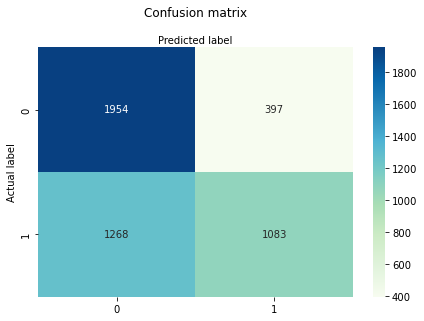

In [42]:
class_names=["high_risk","low_risk"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_rs), annot=True, cmap="GnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

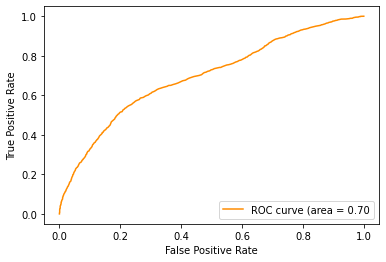

In [43]:
#ROC Curve - plot of the true positive rate against the false positive rate
y_ran_scaled_pred_proba = ran_scaled.predict_proba(X1_dummies_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_rs_true,  y_ran_scaled_pred_proba)
auc = metrics.roc_auc_score(y_rs_true, y_ran_scaled_pred_proba)
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

StandardScaler for data scaling  for the Random Forest Regression Model doesn't bring any improvement for prediction. AUC has value 0.70. Testing score is the same for both situation - unscaled or scaled data, it has value 0.64. 
If the feature - selection will be performed, then we will get different feature from unscaled vs. scaled data.


### RandomForest-Feature-Selection ang LogisticRegression Model with Selected Features

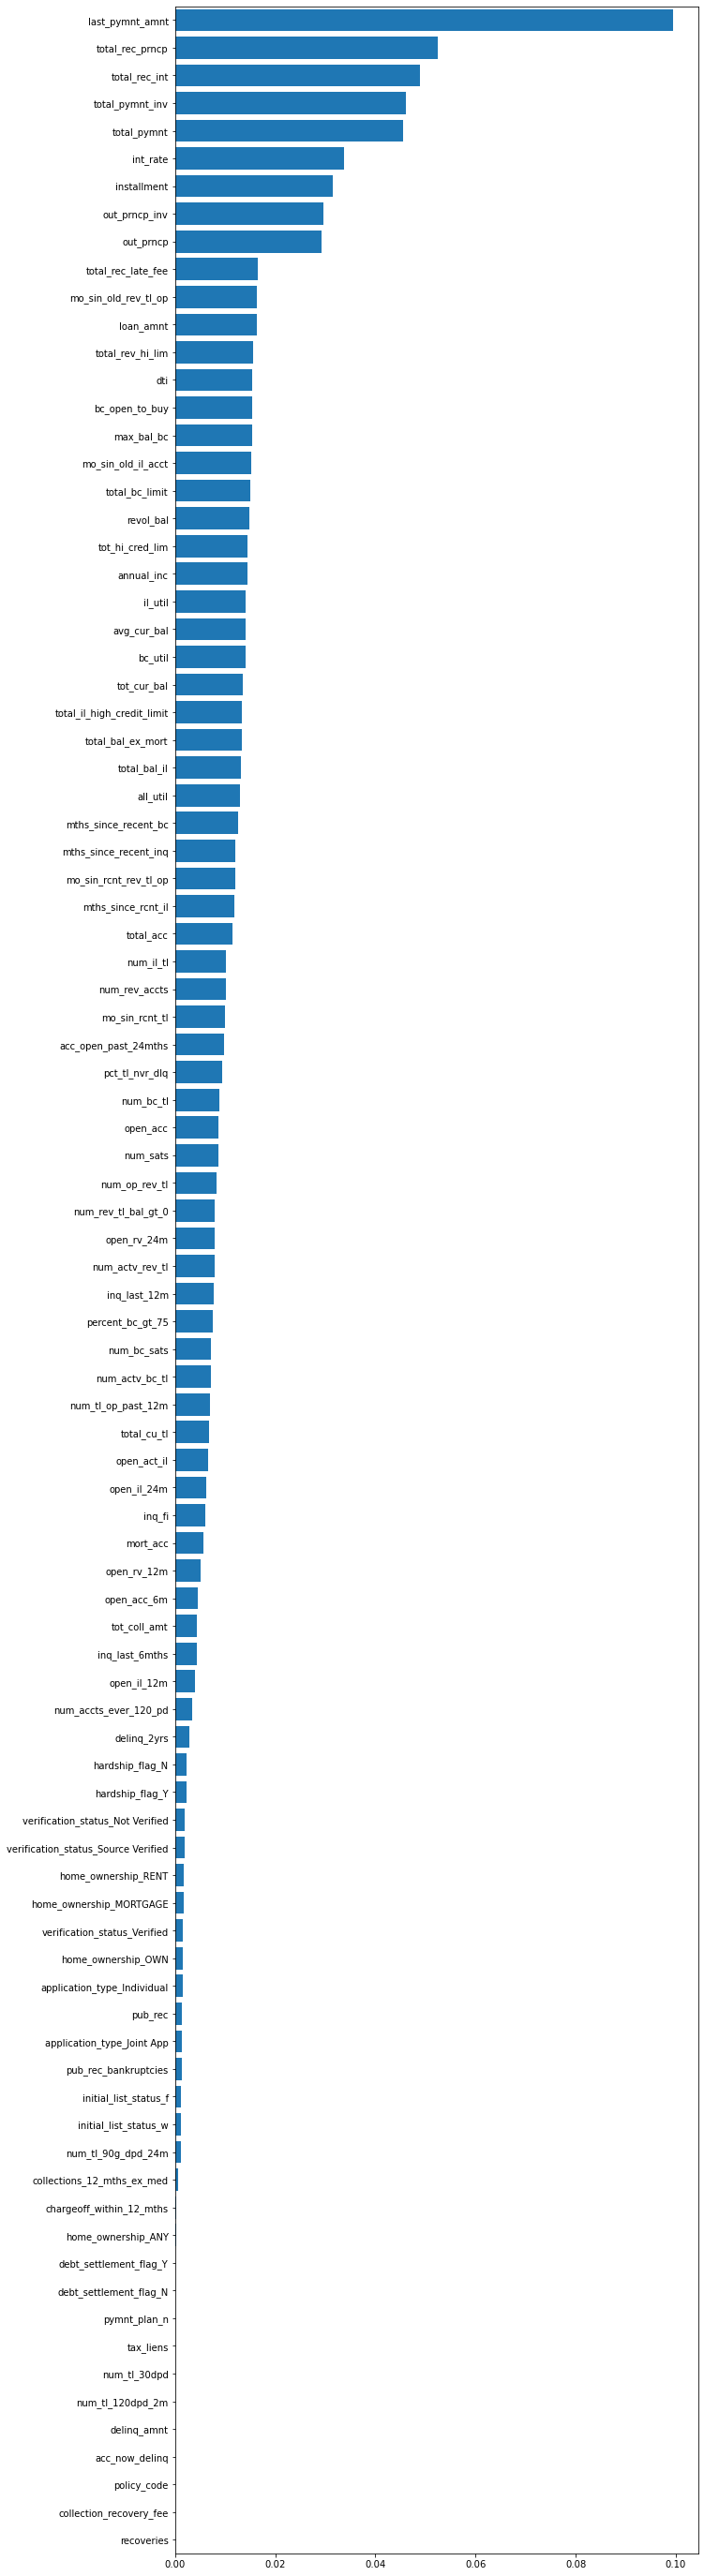

In [44]:
feature_importances = ran_scaled.feature_importances_
features1 = sorted(zip(X_dummies.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features1]
width = [f[1] for f in features1]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [45]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(ran_scaled)
sel.fit(X_dummies_scaled, y_label)
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [46]:
X_selected_dummies_scaled = sel.transform(X_dummies_scaled)
X1_selected_dummies_scaled = sel.transform(X1_dummies_scaled)


* LogisticRegression Model with Selected Features

In [47]:
clff = LogisticRegression(max_iter = 10000).fit(X_selected_dummies_scaled, y_label)

In [48]:
y_clff_pred =clff.predict(X1_selected_dummies_scaled)
y_lrf_true = y1_label
confusion_matrix(y_lrf_true, y_clff_pred)


array([[1774,  577],
       [ 497, 1854]], dtype=int64)

In [49]:
print(classification_report(y_lrf_true, y_clff_pred, target_names=target_names))
print(f'Training Score: {clff.score(X_selected_dummies_scaled, y_label)}')
print(f'Testing Score: {clff.score(X1_selected_dummies_scaled, y_lrf_true)}')

              precision    recall  f1-score   support

   high_risk       0.78      0.75      0.77      2351
    low_risk       0.76      0.79      0.78      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702

Training Score: 0.7104269293924467
Testing Score: 0.7715865589111016


In [50]:
print("Accuracy:",metrics.accuracy_score(y_lrf_true, y_clff_pred))
print("Precision:",metrics.precision_score(y_lrf_true, y_clff_pred))
print("Sensitivity:",metrics.recall_score(y_lrf_true, y_clff_pred))

Accuracy: 0.7715865589111016
Precision: 0.762649115590292
Sensitivity: 0.7886005954912803


Logistic Regression Model with selected features from Random Forest will work the best for our dataset. Model score improved to 0.77, with accuracy 0.77 and precision 0.76. It means 76% of the predictions will be correct (for high risk and low risk loans).
This model will be able to catch 78% of all positive instances.
